<a href="https://colab.research.google.com/github/SigmaRajput/ML_classes_2022/blob/master/22nd_aug_lec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#difference between classification and regrestion

import tensorflow as tf

#for data generation weight and bias is needed
TRUE_W = 3.6
TRUE_b = 1.4

NUM_EXAMPLES = 10000
learning_rate = 1.0

inputs = tf.random.normal(shape = [NUM_EXAMPLES])
noise = tf.random.normal(shape = [NUM_EXAMPLES])
outputs = inputs * TRUE_W+ TRUE_b + noise #### y = mx + c -->> m is weight and bias is y intercept

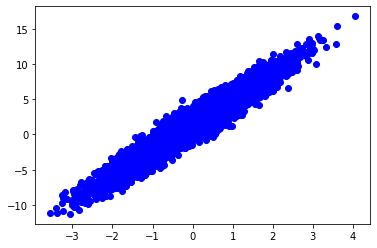

In [16]:
import matplotlib.pyplot as plt
plt.scatter(inputs,outputs, c = 'b')

In [4]:
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
  
  def __call__(self,x):
    return self.W * x + self.b ### output calculation
  
model = Model()
assert model(3.0).numpy() == 15.0

In [5]:
## to find diff between calculated value and actial value of v

def loss(target_y, predicted_y):
  return tf. reduce_mean(tf.square(target_y - predicted_y))

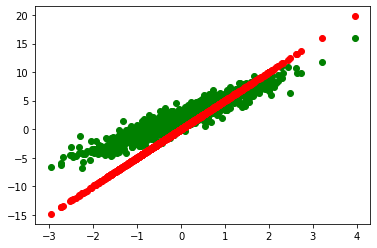

current loss: %1.6f% 9.256357


In [12]:
import matplotlib.pyplot as plt
plt.scatter(inputs, outputs, c = 'g')
plt.scatter(inputs, model(inputs), c= 'r')
plt.show()
print('current loss: %1.6f%', loss(model(inputs), outputs). numpy())

In [18]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(outputs,model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate*dW)  #if learning rate is increased the value becomes larger and get inaccurate
  model.b.assign_sub(learning_rate*db)

In [21]:
## epoch tells how manny  times the model needas to be trained...

model= Model()
ws, bs= [], []
epochs = range(10)
for epoch in epochs:
  ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))
  train(model, inputs, outputs, learning_rate = 0.1)
  print('Epoch %2d: W = %1.2f, b = %1.2f, loss = %2f', (epoch,ws[-1], bs[-1], current_loss))


SyntaxError: ignored

In [ ]:
plt.plot(epochs, ws, 'r', epochs,bs, 'b')
plt.plot([TRUE_W]*len(epochs), 'r' , [TRUE_b]*(epochs), 'b')
plt.legend()

In [ ]:

plt.scatter(inputs, outputs, c = 'g')
plt.scatter(inputs, model(inputs), c= 'r')
plt.show()
print('current loss: %1.6f%', loss(model(inputs), outputs). numpy())

In [ ]:
##Task ->> WAp to generate, linear data with weigth = 3.6 and bias  = 1.4, with random noise, data input size = 10000